### 딥러닝 CNN 프로젝트

#### 가위바위보
- 사전 훈련 모델 또는 미세 조정 (저용량)

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/Rock_Scissors_Paper/original/'

idg = ImageDataGenerator(rescale=1./255)

generator = idg.flow_from_directory(root, target_size=(64, 64), batch_size=32, class_mode='categorical')
print(generator.class_indices)

Found 2188 images belonging to 3 classes.
{'paper': 0, 'rock': 1, 'scissors': 2}


In [2]:
target_name = {v: k for k, v in generator.class_indices.items()}
target_name

{0: 'paper', 1: 'rock', 2: 'scissors'}

In [3]:
target_names = []
for target in generator.classes:
    target_names.append(target_name[target])

In [4]:
import pandas as pd

RSP_df = pd.DataFrame({'file_paths': generator.filepaths, 'target_names': target_names, 'targets': generator.classes})
RSP_df.file_paths = RSP_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))
RSP_df

file_paths target_names  targets
0     ./datasets/Rock_Scissors_Paper/original/paper/...        paper        0
1     ./datasets/Rock_Scissors_Paper/original/paper/...        paper        0
2     ./datasets/Rock_Scissors_Paper/original/paper/...        paper        0
3     ./datasets/Rock_Scissors_Paper/original/paper/...        paper        0
4     ./datasets/Rock_Scissors_Paper/original/paper/...        paper        0
...                                                 ...          ...      ...
2183  ./datasets/Rock_Scissors_Paper/original/scisso...     scissors        2
2184  ./datasets/Rock_Scissors_Paper/original/scisso...     scissors        2
2185  ./datasets/Rock_Scissors_Paper/original/scisso...     scissors        2
2186  ./datasets/Rock_Scissors_Paper/original/scisso...     scissors        2
2187  ./datasets/Rock_Scissors_Paper/original/scisso...     scissors        2

[2188 rows x 3 columns]

In [5]:
from glob import glob
import os

root = './datasets/Rock_Scissors_Paper/original/'

directories = glob(os.path.join(root, '*'))
print(directories)
directory_names = []
for directory in directories:
    directory_names.append(directory[directory.rindex('\\') + 1:])

print(directory_names)

['./datasets/Rock_Scissors_Paper/original\\paper', './datasets/Rock_Scissors_Paper/original\\rock', './datasets/Rock_Scissors_Paper/original\\scissors']
['paper', 'rock', 'scissors']


In [7]:
root = './datasets/Rock_Scissors_Paper/original/'

for name in directory_names:
    for i, file_name in enumerate(os.listdir(os.path.join(root, name))):
        old_file = os.path.join(root + name + '/', file_name)
        new_file = os.path.join(root + name + '/', name + str(i + 1) + '.png')

        os.rename(old_file, new_file)

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/Rock_Scissors_Paper/original/'

image_data_generator = ImageDataGenerator(rescale=1./255)

generator = image_data_generator.flow_from_directory(root, target_size = (150, 150), batch_size=32, class_mode='categorical')
print(generator.class_indices)

Found 2188 images belonging to 3 classes.
{'paper': 0, 'rock': 1, 'scissors': 2}


In [2]:
target_name = {v: k for k, v in generator.class_indices.items()}
target_name

{0: 'paper', 1: 'rock', 2: 'scissors'}

In [3]:
target_names = []
for target in generator.classes:
    target_names.append(target_name[target])

In [4]:
import pandas as pd

RSP_df = pd.DataFrame({'file_paths': generator.filepaths, 'target_names': target_names, 'targets': generator.classes})
RSP_df.file_paths = RSP_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))
RSP_df

file_paths target_names  targets
0     ./datasets/Rock_Scissors_Paper/original/paper/...        paper        0
1     ./datasets/Rock_Scissors_Paper/original/paper/...        paper        0
2     ./datasets/Rock_Scissors_Paper/original/paper/...        paper        0
3     ./datasets/Rock_Scissors_Paper/original/paper/...        paper        0
4     ./datasets/Rock_Scissors_Paper/original/paper/...        paper        0
...                                                 ...          ...      ...
2183  ./datasets/Rock_Scissors_Paper/original/scisso...     scissors        2
2184  ./datasets/Rock_Scissors_Paper/original/scisso...     scissors        2
2185  ./datasets/Rock_Scissors_Paper/original/scisso...     scissors        2
2186  ./datasets/Rock_Scissors_Paper/original/scisso...     scissors        2
2187  ./datasets/Rock_Scissors_Paper/original/scisso...     scissors        2

[2188 rows x 3 columns]

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def show_images(generator, ncols=8):

    random_indices = np.random.choice(len(generator.filepaths), 8, replace=False)
    #print(random_indices)

    target_name = {v : k for k, v in generator.class_indices.items()}
    
    target_names = []
    
    for target in generator.classes:
        target_names.append(target_name[target])

    # print(target_names)
    images = []
    indices= []

    
    for index in random_indices:
        image = cv2.cvtColor(cv2.imread(generator.filepaths[index]), cv2.COLOR_BGR2RGB)
        images.append(image)
        indices.append(index)
    
    fig, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i, index in zip(range(ncols), indices):
        axes[i].imshow(images[i])
        axes[i].axis('off')
        axes[i].set_title(target_names[index])


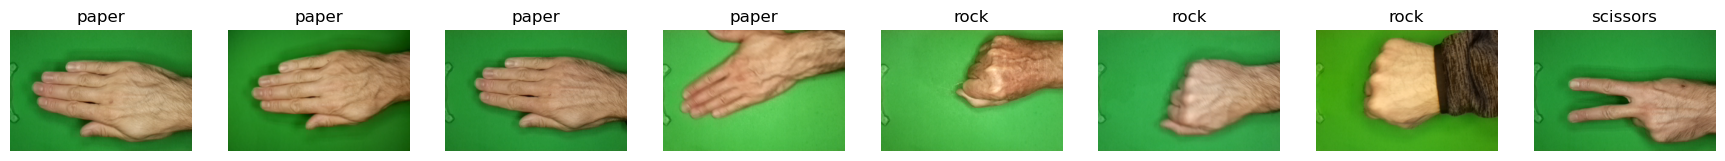

In [13]:
show_images(generator)

In [6]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_targets, test_targets = \
train_test_split(RSP_df.file_paths, 
                 RSP_df.targets, 
                 stratify=RSP_df.targets, 
                 test_size=0.2, random_state=124)


train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, 
                 train_targets, 
                 stratify=train_targets, 
                 test_size=0.2, random_state=124)

print(test_targets.value_counts())
print(train_targets.value_counts())
print(test_targets.value_counts())

targets
2    150
1    145
0    143
Name: count, dtype: int64
targets
2    480
1    465
0    455
Name: count, dtype: int64
targets
2    150
1    145
0    143
Name: count, dtype: int64


In [15]:
import shutil

root = './datasets/Rock_Scissors_Paper/'

for file_path in train_images:
    print(file_path[len(root+ 'original/'): file_path.rindex('/')])
    rsp_dir = file_path[len(root+ 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'train/' + rsp_dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

paper
scissors
rock
rock
paper
paper
scissors
scissors
rock
paper
rock
paper
paper
paper
paper
rock
paper
scissors
scissors
scissors
scissors
paper
scissors
paper
paper
rock
scissors
scissors
paper
rock
rock
scissors
rock
rock
rock
rock
paper
rock
scissors
scissors
scissors
scissors
scissors
scissors
scissors
paper
rock
rock
scissors
paper
rock
paper
rock
scissors
rock
scissors
scissors
scissors
rock
paper
paper
paper
scissors
scissors
paper
scissors
rock
paper
scissors
scissors
rock
rock
rock
paper
rock
scissors
paper
scissors
scissors
scissors
scissors
scissors
paper
paper
rock
rock
rock
paper
rock
paper
rock
rock
scissors
paper
rock
scissors
rock
scissors
scissors
paper
scissors
scissors
scissors
paper
rock
paper
paper
rock
paper
scissors
rock
paper
paper
rock
rock
scissors
scissors
rock
scissors
rock
scissors
scissors
rock
scissors
rock
paper
paper
scissors
rock
rock
scissors
paper
scissors
scissors
rock
paper
scissors
scissors
scissors
scissors
rock
rock
scissors
paper
scissors
ro

In [16]:
import shutil

root = './datasets/Rock_Scissors_Paper/'

for file_path in validation_images:
    print(file_path[len(root+ 'original/'): file_path.rindex('/')])
    rsp_dir = file_path[len(root+ 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'validation/' + rsp_dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

scissors
rock
rock
rock
rock
rock
paper
rock
scissors
rock
paper
rock
paper
paper
scissors
paper
paper
rock
scissors
rock
paper
paper
rock
scissors
scissors
scissors
rock
paper
scissors
paper
paper
paper
scissors
rock
scissors
scissors
rock
paper
rock
scissors
scissors
scissors
rock
scissors
scissors
paper
rock
scissors
scissors
rock
scissors
paper
scissors
paper
scissors
scissors
rock
rock
rock
rock
scissors
scissors
rock
rock
scissors
scissors
scissors
rock
paper
scissors
paper
scissors
rock
paper
paper
rock
paper
rock
paper
scissors
scissors
paper
paper
rock
rock
rock
scissors
paper
scissors
paper
rock
rock
rock
rock
paper
scissors
paper
paper
rock
rock
scissors
paper
rock
paper
rock
rock
scissors
scissors
rock
scissors
scissors
scissors
scissors
scissors
rock
paper
paper
rock
rock
rock
paper
paper
rock
rock
scissors
rock
rock
paper
scissors
scissors
rock
rock
rock
scissors
rock
rock
rock
paper
rock
scissors
paper
paper
paper
scissors
rock
paper
rock
rock
rock
paper
paper
rock
rock


In [17]:
import shutil

root = './datasets/Rock_Scissors_Paper/'

for file_path in test_images:
    print(file_path[len(root+ 'original/'): file_path.rindex('/')])
    rsp_dir = file_path[len(root+ 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'test/' + rsp_dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

paper
paper
scissors
scissors
paper
scissors
rock
paper
rock
rock
rock
paper
scissors
scissors
scissors
rock
paper
rock
rock
rock
scissors
scissors
rock
paper
paper
rock
scissors
paper
paper
rock
rock
rock
paper
scissors
scissors
paper
paper
scissors
rock
rock
paper
scissors
scissors
rock
scissors
rock
paper
paper
rock
paper
paper
paper
paper
scissors
scissors
paper
paper
paper
rock
scissors
rock
rock
paper
paper
rock
scissors
paper
paper
rock
scissors
scissors
paper
scissors
scissors
paper
scissors
paper
rock
rock
rock
rock
rock
rock
scissors
rock
rock
rock
rock
paper
rock
scissors
scissors
paper
rock
scissors
rock
paper
rock
rock
paper
rock
paper
rock
rock
scissors
paper
paper
paper
paper
scissors
paper
paper
paper
paper
paper
rock
rock
paper
scissors
scissors
scissors
rock
rock
paper
rock
scissors
scissors
scissors
scissors
paper
paper
scissors
scissors
scissors
rock
scissors
paper
rock
scissors
rock
scissors
paper
paper
scissors
scissors
paper
scissors
rock
rock
scissors
rock
paper

In [7]:
train_df = RSP_df.iloc[train_images.index].reset_index(drop=True)
validation_df = RSP_df.iloc[validation_images.index].reset_index(drop=True)
test_df = RSP_df.iloc[test_images.index].reset_index(drop=True)

print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(1400, 3)
(350, 3)
(438, 3)


### 사용할 사전 모델
- Xception
- Mobilenet

In [8]:
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMAGE_SIZE = 150
BATCH_SIZE = 64

train_generator = ImageDataGenerator(preprocessing_function=xception_preprocess_input)
validation_generator = ImageDataGenerator(preprocessing_function=xception_preprocess_input)
test_generator = ImageDataGenerator(preprocessing_function=xception_preprocess_input)

train_flow = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col = 'file_paths',
    y_col = 'target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    shuffle = True
)

validation_flow = validation_generator.flow_from_dataframe(
    dataframe=validation_df,
    x_col = 'file_paths',
    y_col = 'target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

test_flow = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col = 'file_paths',
    y_col = 'target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 1400 validated image filenames belonging to 3 classes.
Found 350 validated image filenames belonging to 3 classes.
Found 438 validated image filenames belonging to 3 classes.
{'paper': 0, 'rock': 1, 'scissors': 2}
{'paper': 0, 'rock': 1, 'scissors': 2}
{'paper': 0, 'rock': 1, 'scissors': 2}


In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(100, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(3, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [10]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='xception', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 74, 74, 32)        │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 74, 74, 32)        │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 74, 74, 32)        │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 72, 72, 64)        │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 72, 72, 64)        │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 72, 72, 64)        │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 72, 72, 128)       │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 72, 72, 128)       │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 72, 72, 128)       │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 72, 72, 128)       │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 72, 72, 128)       │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 36, 36, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 36, 36, 128)       │               

 Total params: 21,066,683 (80.36 MB)

 Trainable params: 21,012,155 (80.16 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import Audio

sound_file = './sounds/test.mp3'

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=8,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=8,
    mode='min'
)

In [69]:
import gc
gc.collect()

22

In [70]:
N_EPOCHS = 10

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Audio(sound_file, autoplay=True)

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - acc: 0.7884 - loss: 0.4640 - val_acc: 0.9543 - val_loss: 0.6897 - learning_rate: 0.0010
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.9996 - loss: 0.0100 - val_acc: 0.9943 - val_loss: 0.1249 - learning_rate: 0.0010
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - acc: 0.9930 - loss: 0.0292 - val_acc: 1.0000 - val_loss: 4.4810e-04 - learning_rate: 0.0010
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.9910 - loss: 0.0394 - val_acc: 0.9857 - val_loss: 0.1700 - learning_rate: 0.0010
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.9952 - loss: 0.0228 - val_acc: 0.9971 - val_loss: 0.0110 - learning_rate: 0.0010
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.9967 - loss: 0.0147 - val_acc: 1.0000 - val_loss: 3.4060e-10 - learning_rate: 0.0010
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - acc: 0.9877 - loss: 0.0348 - val_acc: 0.9743 - val_loss: 0.1144 - learning_rate: 0.0010
Epoch 8/10
22/22 ━━━━━━

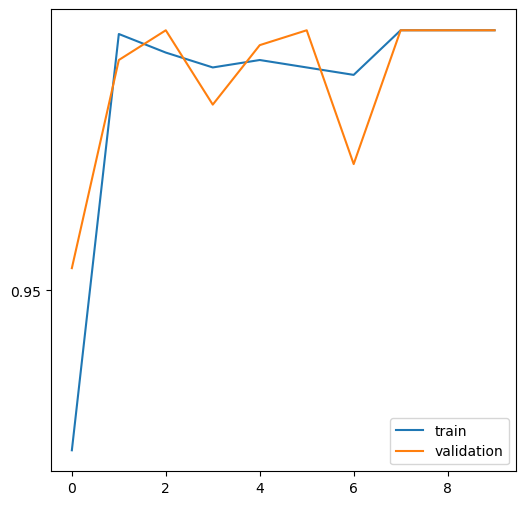

In [71]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

In [72]:
model.evaluate(test_flow)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 347ms/step - acc: 0.9893 - loss: 0.0452


[0.019251950085163116, 0.9954338073730469]

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input

def get_prediction_from_generator(image):
    print(image.shape)
    image = cv2.resize(image, (64, 64))
    image = img_to_array(image)
    
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)

    # print(prediction)
    # print(target_name)
    for i, prediction in enumerate(prediction):
        print(i, prediction)
        predicted_class_index = np.argmax(prediction)
        predicted_class_label = target_name[predicted_class_index]
    
    return predicted_class_label

def predict_images(flow, ncols=8):
    random_indices = np.random.choice(len(flow.filepaths), 8, replace=False)
    #print(random_indices)

    target_name = {v : k for k, v in generator.class_indices.items()}
    target_names = []
    
    for target in generator.classes:
        target_names.append(target_name[target])

    # print(target_names)
    images = []
    indices= []
    predicts=[]
    
    for index in random_indices:
        image = cv2.cvtColor(cv2.imread(generator.filepaths[index]), cv2.COLOR_BGR2RGB)
        image = xception_preprocess_input(image)
        images.append(image)
        indices.append(index)
        prediction = get_prediction_from_generator(image)
        predicts.append(prediction)
        
    fig, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i, index in zip(range(ncols), indices):
        print(i, index)
        axes[i].imshow(images[i])
        # axes[i].axis('off')
        axes[i].set_title(f'Answer : {target_names[index]}')
        axes[i].set_xlabel(f'Predict : {predicts[i]}')
        


(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
0 [0. 1. 0.]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
0 [0. 1. 0.]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
0 [0. 1. 0.]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
0 [0. 1. 0.]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
0 [0. 1. 0.]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
0 [0. 1. 0.]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
0 [0. 1. 0.]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
0 [0. 1. 0.]
0 195
1 218
2 234
3 126
4 11
5 132
6 177
7 349


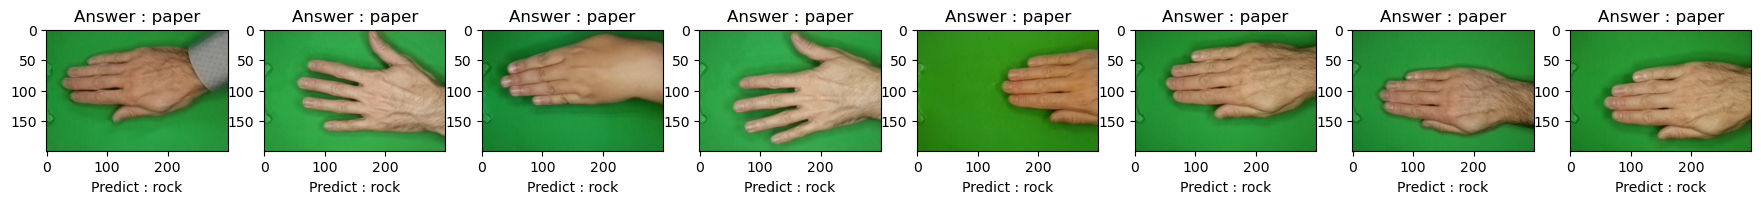

In [75]:
predict_images(test_flow, ncols=8)

In [22]:
def show_image(image):
    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    plt.axis('off')

def get_prediction_from_generator(image, image_size=(150, 150)):
    image = cv2.resize(image, image_size)
    image = img_to_array(image)
    
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)

    # print(prediction)
    print(target_name)
    for i, prediction in enumerate(prediction):
        print(i, prediction)
        predicted_class_index = np.argmax(prediction)
        predicted_class_label = target_name[predicted_class_index]
    
    return predicted_class_label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
0 [0. 1. 0.]


'rock'

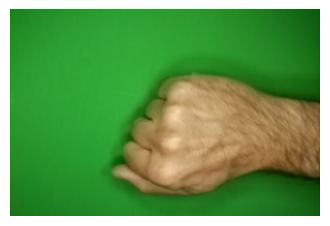

In [80]:
image = cv2.cvtColor(cv2.imread(test_flow.filepaths[100]), cv2.COLOR_BGR2RGB)
show_image(image)
get_prediction_from_generator(image, image_size=(50, 50))

확인 결과, 전부 다 가위라고 예측함
- 훈련 이미지의 사이즈를 줄여야 한다고 판단

Cycle 2

In [12]:
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMAGE_SIZE = 64
BATCH_SIZE = 64

train_generator = ImageDataGenerator(preprocessing_function=xception_preprocess_input)
validation_generator = ImageDataGenerator(preprocessing_function=xception_preprocess_input)
test_generator = ImageDataGenerator(preprocessing_function=xception_preprocess_input)

train_flow = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col = 'file_paths',
    y_col = 'target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    shuffle = True
)

validation_flow = validation_generator.flow_from_dataframe(
    dataframe=validation_df,
    x_col = 'file_paths',
    y_col = 'target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

test_flow = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col = 'file_paths',
    y_col = 'target_names',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 1400 validated image filenames belonging to 3 classes.
Found 350 validated image filenames belonging to 3 classes.
Found 438 validated image filenames belonging to 3 classes.
{'paper': 0, 'rock': 1, 'scissors': 2}
{'paper': 0, 'rock': 1, 'scissors': 2}
{'paper': 0, 'rock': 1, 'scissors': 2}


In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(100, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(3, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [14]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='xception', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 31, 31, 32)        │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 31, 31, 32)        │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 31, 31, 32)        │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 29, 29, 64)        │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 29, 29, 64)        │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 29, 29, 64)        │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 29, 29, 128)       │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 29, 29, 128)       │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 29, 29, 128)       │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 29, 29, 128)       │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 29, 29, 128)       │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 15, 15, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 15, 15, 128)       │               

 Total params: 21,066,683 (80.36 MB)

 Trainable params: 21,012,155 (80.16 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import Audio

sound_file = './sounds/test.mp3'

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=8,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=8,
    mode='min'
)

In [16]:
import gc
gc.collect()

12728

In [17]:
N_EPOCHS = 10

history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Audio(sound_file, autoplay=True)

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 581ms/step - acc: 0.6688 - loss: 0.8397 - val_acc: 0.6686 - val_loss: 2.4725 - learning_rate: 0.0010
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 540ms/step - acc: 0.9707 - loss: 0.3831 - val_acc: 0.6400 - val_loss: 19.0352 - learning_rate: 0.0010
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 544ms/step - acc: 0.9802 - loss: 0.1884 - val_acc: 0.9657 - val_loss: 0.4409 - learning_rate: 0.0010
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 542ms/step - acc: 0.9974 - loss: 0.0151 - val_acc: 0.9971 - val_loss: 0.0048 - learning_rate: 0.0010
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 553ms/step - acc: 0.9985 - loss: 0.0246 - val_acc: 0.9971 - val_loss: 0.0059 - learning_rate: 0.0010
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 549ms/step - acc: 0.9935 - loss: 0.0373 - val_acc: 0.9914 - val_loss: 0.0934 - learning_rate: 0.0010
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 549ms/step - acc: 0.9977 - loss: 0.0163 - val_acc: 0.9971 - val_loss: 0.0587 - learning_rate: 0.0010
Epoch 8/1

In [18]:
model.evaluate(test_flow)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - acc: 1.0000 - loss: 0.0021


[0.0009133731946349144, 1.0]

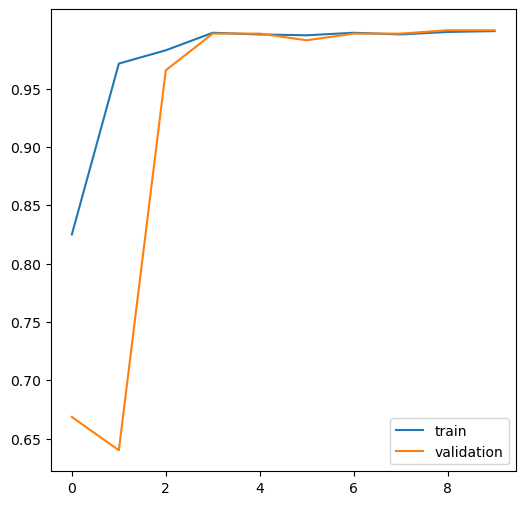

In [20]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

In [64]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input

def get_prediction_from_generator(image):
    print(image.shape)
    image = cv2.resize(image, (64, 64))
    image = img_to_array(image)
    
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)

    # print(prediction)
    # print(target_name)
    for i, prediction in enumerate(prediction):
        print(i, prediction)
        predicted_class_index = np.argmax(prediction)
        predicted_class_label = target_name[predicted_class_index]
    
    return predicted_class_label

def predict_images(flow, ncols=8):
    random_indices = np.random.choice(len(flow.filepaths), 8, replace=False)
    print(len(flow.filepaths))
    print(random_indices)
    
    target_name = {v : k for k, v in flow.class_indices.items()}
    target_names = []
    
    for target in flow.classes:
        target_names.append(target_name[target])

    # print(target_names)
    images = []
    predicts=[]
    
    for index in random_indices:
        image = cv2.cvtColor(cv2.imread(flow.filepaths[index]), cv2.COLOR_BGR2RGB)
        image = xception_preprocess_input(image)
        images.append(image)
        prediction = get_prediction_from_generator(image)
        predicts.append(prediction)
        
    fig, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i, index in zip(range(ncols), random_indices):
        print(i, index)
        axes[i].imshow(images[i])
        # axes[i].axis('off')
        axes[i].set_title(f'Answer : {target_names[index]}')
        axes[i].set_xlabel(f'Predict : {predicts[i]}')
        


In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_root = './datasets/Rock_Scissors_Paper/test/'

idg = ImageDataGenerator(rescale=1./255)

test_generator = idg.flow_from_directory(test_root, target_size=(64, 64), batch_size=32, class_mode='categorical', shuffle=True)
print(test_generator.class_indices)

Found 438 images belonging to 3 classes.
{'paper': 0, 'rock': 1, 'scissors': 2}


438
[209 235 113 401 349   7  37 361]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
0 [9.3595156e-07 9.9999833e-01 7.0251855e-07]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
0 [1.0073866e-06 9.9999821e-01 8.0358456e-07]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
0 [9.9994671e-01 4.5332158e-06 4.8741593e-05]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
0 [4.18652751e-11 1.12172675e-13 1.00000000e+00]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
0 [6.6445725e-12 8.3730892e-15 1.0000000e+00]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
0 [1.0000000e+00 7.1136094e-22 2.2701469e-20]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
0 [1.0000000e+00 9.5887165e-09 4.6901445e-08]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 [5.086897e-13 4.456031e-16 1.000000e+00]
0 209
1 235


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2 113
3 401
4 349
5 7
6 37
7 361


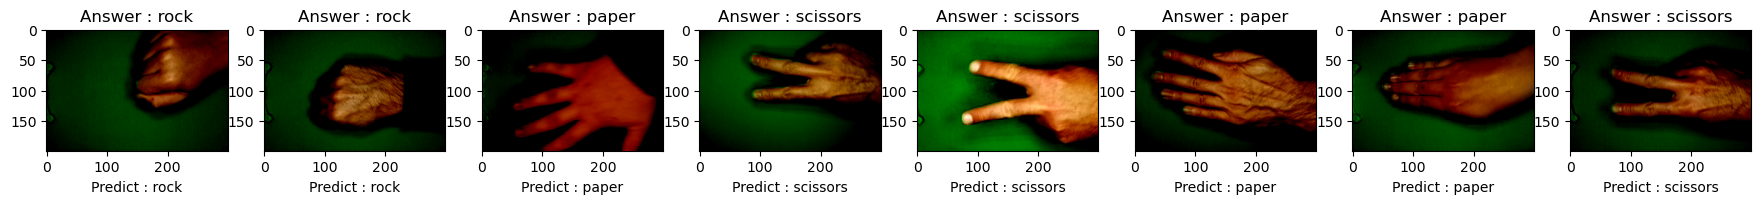

In [66]:
predict_images(test_generator)

In [78]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input

def get_prediction_from_web(image, model):
    
    image = cv2.resize(image, (64, 64))
    image = xception_preprocess_input(image)
    image = img_to_array(image)
    
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)

    predicted_class_index = np.argmax(prediction)
    
    return predicted_class_index

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
2
{'paper': 0, 'rock': 1, 'scissors': 2}


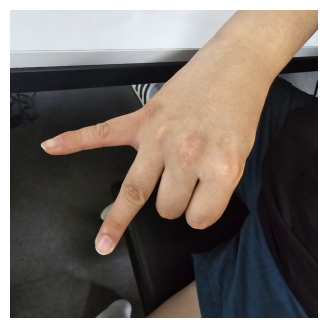

In [86]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.xception import decode_predictions

#image = load_img('./datasets/Rock_Scissors_Paper/deffdongs_scissor.jpg', target_size=(224, 224))
image = cv2.imread('./datasets/Rock_Scissors_Paper/deffdongs_scissor.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

prediction = get_prediction_from_web(image, model)
show_image(image)
print(prediction)
print(test_flow.class_indices)


### MobileNet으로 훈련 진행

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/Rock_Scissors_Paper/original/'

image_data_generator = ImageDataGenerator(rescale=1./255)

generator = image_data_generator.flow_from_directory(root, target_size = (150, 150), batch_size=32, class_mode='categorical')
print(generator.class_indices)

Found 2188 images belonging to 3 classes.
{'paper': 0, 'rock': 1, 'scissors': 2}


In [2]:
import gc
gc.collect()

6

In [3]:
target_name = {v: k for k, v in generator.class_indices.items()}
target_name

{0: 'paper', 1: 'rock', 2: 'scissors'}

In [4]:
target_names = []
for target in generator.classes:
    target_names.append(target_name[target])

In [5]:
import pandas as pd

RSP_df = pd.DataFrame({'file_paths': generator.filepaths, 'target_names': target_names, 'targets': generator.classes})
RSP_df.file_paths = RSP_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))
RSP_df

file_paths target_names  targets
0     ./datasets/Rock_Scissors_Paper/original/paper/...        paper        0
1     ./datasets/Rock_Scissors_Paper/original/paper/...        paper        0
2     ./datasets/Rock_Scissors_Paper/original/paper/...        paper        0
3     ./datasets/Rock_Scissors_Paper/original/paper/...        paper        0
4     ./datasets/Rock_Scissors_Paper/original/paper/...        paper        0
...                                                 ...          ...      ...
2183  ./datasets/Rock_Scissors_Paper/original/scisso...     scissors        2
2184  ./datasets/Rock_Scissors_Paper/original/scisso...     scissors        2
2185  ./datasets/Rock_Scissors_Paper/original/scisso...     scissors        2
2186  ./datasets/Rock_Scissors_Paper/original/scisso...     scissors        2
2187  ./datasets/Rock_Scissors_Paper/original/scisso...     scissors        2

[2188 rows x 3 columns]

In [6]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_targets, test_targets = \
train_test_split(RSP_df.file_paths, 
                 RSP_df.targets, 
                 stratify=RSP_df.targets, 
                 test_size=0.2, random_state=124)


train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, 
                 train_targets, 
                 stratify=train_targets, 
                 test_size=0.2, random_state=124)

print(test_targets.value_counts())
print(train_targets.value_counts())
print(test_targets.value_counts())

targets
2    150
1    145
0    143
Name: count, dtype: int64
targets
2    480
1    465
0    455
Name: count, dtype: int64
targets
2    150
1    145
0    143
Name: count, dtype: int64


In [7]:
train_df = RSP_df.iloc[train_images.index].reset_index(drop=True)
validation_df = RSP_df.iloc[validation_images.index].reset_index(drop=True)
test_df = RSP_df.iloc[test_images.index].reset_index(drop=True)

print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(1400, 3)
(350, 3)
(438, 3)


과한 일반화를 방지하기 위해 albumentation도 같이 적용

In [12]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

IMAGE_SIZE = 224
BATCH_SIZE = 64

class Dataset(Sequence):
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.shuffle = shuffle
        self.preprocess = preprocess
        
        if self.shuffle:
            self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.targets) / self.batch_size))

    def __getitem__(self, index):
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        for i in range(file_paths_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            if self.aug is not None:
                image = self.aug(image=image)['image']

            if self.preprocess is not None:
                image = self.preprocess(image)
                
            results_batch[i] = image

        return results_batch, targets_batch

    def on_epoch_end(self):
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)

In [13]:
import albumentations as A
from tensorflow.keras.applications.mobilenet import preprocess_input as mobile_preprocess_input

train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.GaussNoise(p=0.5, var_limit=(400, 900)),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=mobile_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobile_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobile_preprocess_input)

In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2, Xception, MobileNetV2, EfficientNetV2B0


def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'efficientnet':
        model = EfficientNetV2B0(input_tensor=input_tensor, include_top=False, weights='imagenet')
        
    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(300, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(3, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [17]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

mobilenet_model = create_model(model_name='mobilenet', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
mobilenet_model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\kangh\AppData\Local\Temp\ipykernel_16144\182803093.py:18: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,643,187 (10.08 MB)

 Trainable params: 2,609,075 (9.95 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import Audio

sound_file = './sounds/test.mp3'

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/PJ2/Mobile/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

In [19]:
N_EPOCHS = 20

mobile_history = mobilenet_model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Audio(sound_file, autoplay=True)

Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - acc: 0.7241 - loss: 0.6938 - val_acc: 0.9400 - val_loss: 0.4849 - learning_rate: 0.0010
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - acc: 0.9735 - loss: 0.1032 - val_acc: 0.6943 - val_loss: 4.1436 - learning_rate: 0.0010
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - acc: 0.9888 - loss: 0.0468 - val_acc: 0.7086 - val_loss: 4.3511 - learning_rate: 0.0010
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - acc: 0.9934 - loss: 0.0354 - val_acc: 0.6743 - val_loss: 6.1498 - learning_rate: 0.0010
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - acc: 0.9940 - loss: 0.0142 - val_acc: 0.7429 - val_loss: 4.7526 - learning_rate: 0.0010
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - acc: 0.9936 - loss: 0.0238 - val_acc: 0.8029 - val_loss: 2.8631 - learning_rate: 0.0010


In [20]:
mobilenet_model.evaluate(test_dataset)

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 853ms/step - acc: 0.8151 - loss: 2.0914


[2.3226871490478516, 0.8242009282112122]

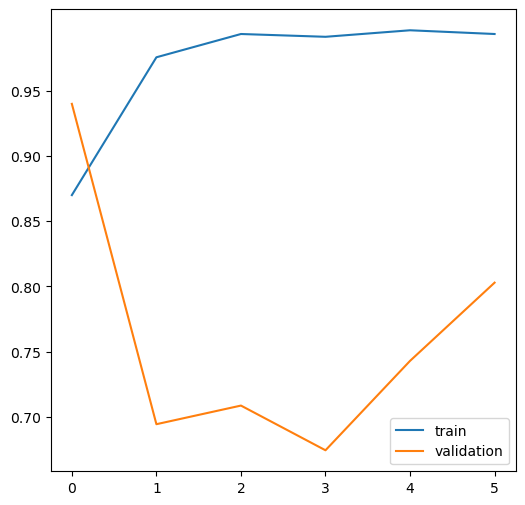

In [34]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(mobile_history)

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications.mobilenet import preprocess_input as mobile_preprocess_input

def get_prediction_from_generator(image, model):
    print(image.shape)
    image = cv2.resize(image, (224, 224))
    image = img_to_array(image)
    
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)

    # print(prediction)
    # print(target_name)
    for i, prediction in enumerate(prediction):
        print(i, prediction)
        predicted_class_index = np.argmax(prediction)
        predicted_class_label = target_name[predicted_class_index]
    
    return predicted_class_label

def predict_images(flow, model, ncols=8):
    random_indices = np.random.choice(len(flow.filepaths), 8, replace=False)
    print(len(flow.filepaths))
    print(random_indices)
    
    target_name = {v : k for k, v in flow.class_indices.items()}
    target_names = []
    
    for target in flow.classes:
        target_names.append(target_name[target])

    # print(target_names)
    images = []
    predicts=[]
    
    for index in random_indices:
        image = cv2.cvtColor(cv2.imread(flow.filepaths[index]), cv2.COLOR_BGR2RGB)
        image = mobile_preprocess_input(image)
        images.append(image)
        prediction = get_prediction_from_generator(image, model)
        predicts.append(prediction)
        
    fig, axes = plt.subplots(figsize=(22, 8), nrows=1, ncols=ncols)
    for i, index in zip(range(ncols), random_indices):
        print(i, index)
        axes[i].imshow(images[i])
        # axes[i].axis('off')
        axes[i].set_title(f'Answer : {target_names[index]}')
        axes[i].set_xlabel(f'Predict : {predicts[i]}')
        


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_root = './datasets/Rock_Scissors_Paper/test/'

idg = ImageDataGenerator(rescale=1./255)

test_generator = idg.flow_from_directory(test_root, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=True)
print(test_generator.class_indices)

Found 438 images belonging to 3 classes.
{'paper': 0, 'rock': 1, 'scissors': 2}


438
[111 334 406 371 142 171  69 198]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
0 [3.1225246e-14 1.0000000e+00 6.9411313e-17]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
0 [3.3960204e-20 2.0224038e-11 1.0000000e+00]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
0 [3.2886132e-19 2.8734902e-14 1.0000000e+00]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
0 [3.7126424e-17 1.0182813e-11 1.0000000e+00]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
0 [1.0000000e+00 5.2499576e-08 1.3282650e-13]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
0 [7.9254315e-21 1.0000000e+00 4.4205353e-20]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
0 [9.9996650e-01 3.3456206e-05 6.8138988e-09]
(200, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
0 [1.34415606e-20 1.00000000e+00 1.19520692e-20]
0 111


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1 334
2 406
3 371
4 142
5 171
6 69
7 198


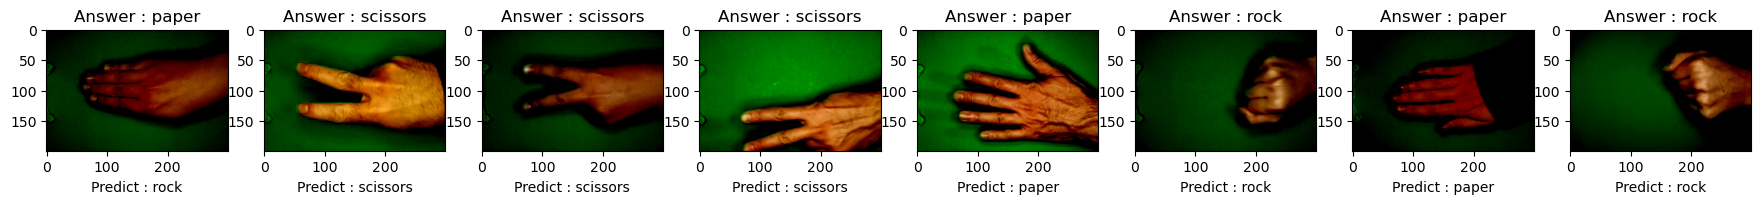

In [28]:
predict_images(test_generator, mobilenet_model, ncols=8)

In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input

def show_image(image):
    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    plt.axis('off')

def get_prediction_from_web(image, model):
    
    image = cv2.resize(image, (64, 64))
    image = xception_preprocess_input(image)
    image = img_to_array(image)
    
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)

    predicted_class_index = np.argmax(prediction)
    
    return predicted_class_index

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
2
{'paper': 0, 'rock': 1, 'scissors': 2}


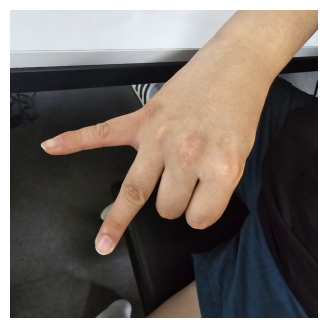

In [33]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.xception import decode_predictions

#image = load_img('./datasets/Rock_Scissors_Paper/deffdongs_scissor.jpg', target_size=(224, 224))
image = cv2.imread('./datasets/Rock_Scissors_Paper/deffdongs_scissor.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

prediction = get_prediction_from_web(image, mobilenet_model)
show_image(image)
print(prediction)
print(test_generator.class_indices)


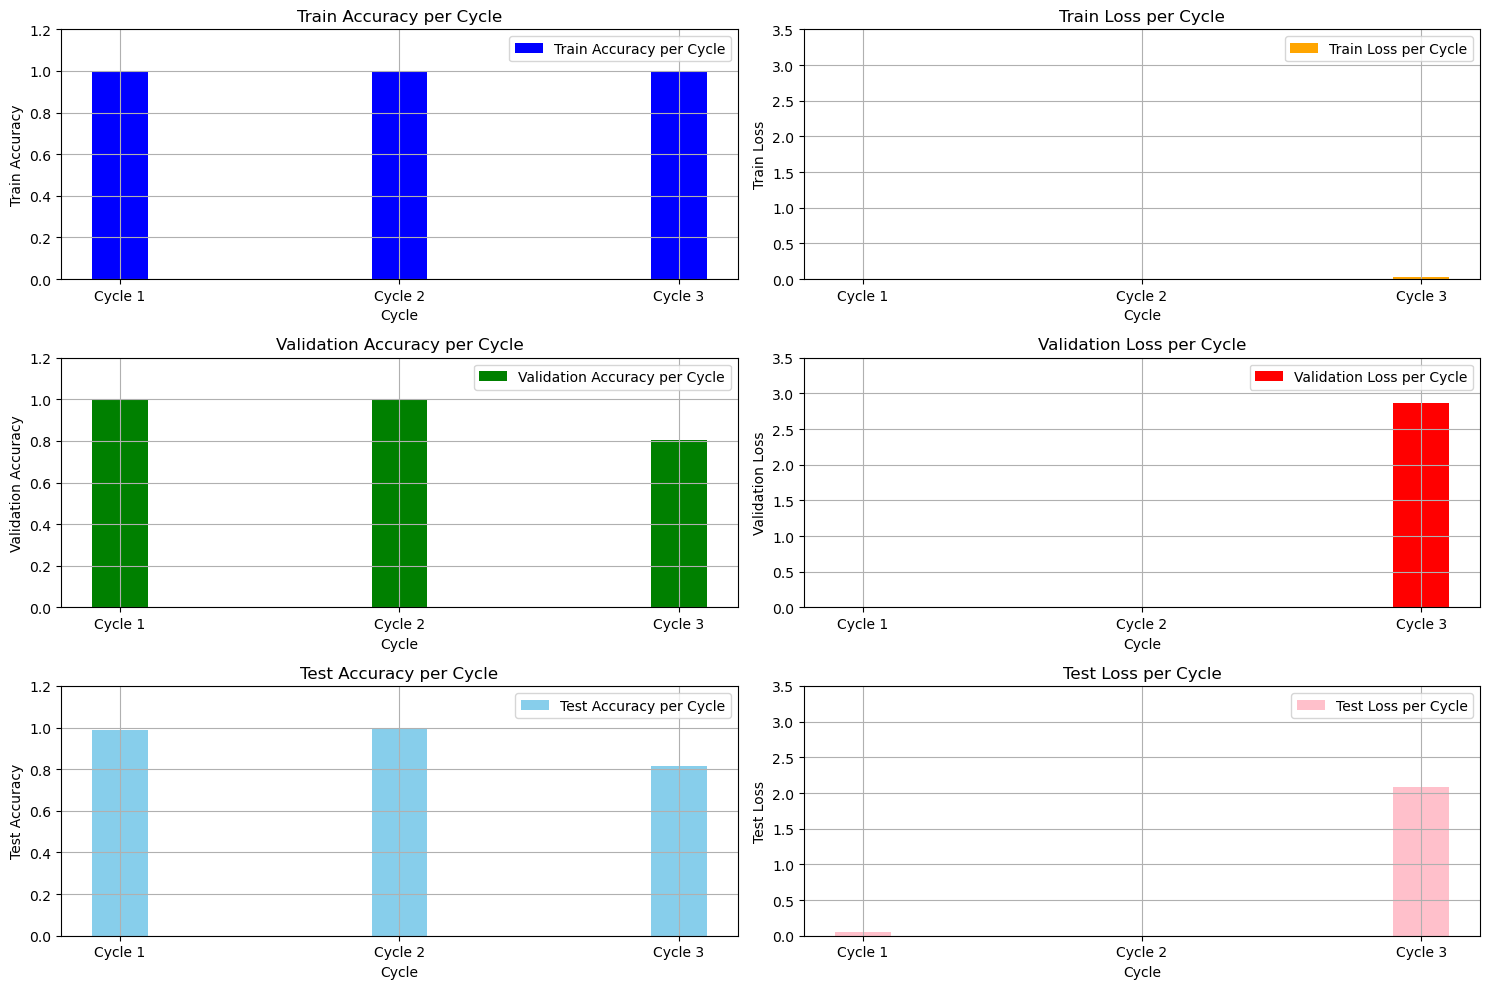

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Data for each cycle
cycle_labels = ['Cycle 1', 'Cycle 2', 'Cycle 3']
acc = [1.0000, 0.9999,0.9936]
loss = [0.0001, 0.0008, 0.0238]
val_acc = [1.0000, 1.0000, 0.8029]
val_loss = [0.0004, 0.0001, 2.8631]
test_acc = [0.9893, 1.0000, 0.8151]
test_loss = [0.0452, 0.0021, 2.0914]

# Plotting
x = np.arange(len(cycle_labels))

width = 0.2

fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Training accuracy
axs[0, 0].bar(x, acc, width, label='Train Accuracy per Cycle', color='blue')
axs[0, 0].set_title('Train Accuracy per Cycle')
axs[0, 0].set_xlabel('Cycle')
axs[0, 0].set_ylabel('Train Accuracy')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(cycle_labels)
axs[0, 0].set_ylim(0.0, 1.2)
axs[0, 0].legend()
axs[0, 0].grid(True)

# Training loss
axs[0, 1].bar(x, loss, width, label='Train Loss per Cycle', color='orange')
axs[0, 1].set_title('Train Loss per Cycle')
axs[0, 1].set_xlabel('Cycle')
axs[0, 1].set_ylabel('Train Loss')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(cycle_labels)
axs[0, 1].set_ylim(0.0, 3.5)
axs[0, 1].legend()
axs[0, 1].grid(True)

# Validation accuracy
axs[1, 0].bar(x, val_acc, width, label='Validation Accuracy per Cycle', color='green')
axs[1, 0].set_title('Validation Accuracy per Cycle')
axs[1, 0].set_xlabel('Cycle')
axs[1, 0].set_ylabel('Validation Accuracy')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(cycle_labels)
axs[1, 0].set_ylim(0.0, 1.2)
axs[1, 0].legend()
axs[1, 0].grid(True)

# Validation loss
axs[1, 1].bar(x, val_loss, width, label='Validation Loss per Cycle', color='red')
axs[1, 1].set_title('Validation Loss per Cycle')
axs[1, 1].set_xlabel('Cycle')
axs[1, 1].set_ylabel('Validation Loss')
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(cycle_labels)
axs[1, 1].set_ylim(0.0, 3.5)
axs[1, 1].legend()
axs[1, 1].grid(True)

# Test accuracy
axs[2, 0].bar(x, test_acc, width, label='Test Accuracy per Cycle', color='skyblue')
axs[2, 0].set_title('Test Accuracy per Cycle')
axs[2, 0].set_xlabel('Cycle')
axs[2, 0].set_ylabel('Test Accuracy')
axs[2, 0].set_xticks(x)
axs[2, 0].set_xticklabels(cycle_labels)
axs[2, 0].set_ylim(0.0, 1.2)
axs[2, 0].legend()
axs[2, 0].grid(True)

# Test loss
axs[2, 1].bar(x, test_loss, width, label='Test Loss per Cycle', color='pink')
axs[2, 1].set_title('Test Loss per Cycle')
axs[2, 1].set_xlabel('Cycle')
axs[2, 1].set_ylabel('Test Loss')
axs[2, 1].set_xticks(x)
axs[2, 1].set_xticklabels(cycle_labels)
axs[2, 1].set_ylim(0.0, 3.5)
axs[2, 1].legend()
axs[2, 1].grid(True)


plt.tight_layout()
plt.show()
